In [ ]:
## 2 EXMPLES

# EXAMPLE 1

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
## Preparing Data

In [ ]:
random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

In [ ]:
N = 200
x,y = CreateDataset(N)
x_ax = range(N)
plt.plot(x_ax, x, 'o', label="feature", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend()
plt.show()

## Defining the model

In [ ]:
def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=3,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

In [ ]:
BuildModel().summary()

## OPTION 1: Fitting with KerasRegressor

In [ ]:
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 


In [ ]:
## Predition

In [ ]:
y_pred = regressor.predict(x)

In [ ]:
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)

In [ ]:
plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

## OPTION 2: Fitting with keras sequential model

In [ ]:
model = BuildModel()
model.fit(x, y, nb_epoch=20, verbose=False, shuffle=False)

In [ ]:
y_krm = model.predict(x) 

In [ ]:
 
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)

In [ ]:
plt.plot(y, label="y-original")
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

# EXAMPLE 2

In [ ]:
# Source - https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
D:\Anaconda\envs\tf_1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tf_1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tf_1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tf_1.14\lib\site-packages\tensorflow\python\framework\dtypes.py

### Step1 : Loading Data

In [2]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
# let us view on sample from the features
print(X_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


### Step2 : Preprocessing:

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [8]:
### Step 3: Building Model

In [9]:
from keras import models, layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

# output layer
# model.add(layers.Dense(1))
model.add(layers.Dense(1, activation='linear'))

### Step 4: COmpling Model

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
### Step5: Model Training

In [13]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s - loss: 577.7565 - mean_absolute_error: 22.2229 - val_loss: 644.3399 - val_mean_absolute_error: 23.6477
Epoch 2/100
323/323 [==============================] - 0s - loss: 571.0698 - mean_absolute_error: 22.0515 - val_loss: 637.9653 - val_mean_absolute_error: 23.4998
Epoch 3/100
323/323 [==============================] - 0s - loss: 564.3362 - mean_absolute_error: 21.8802 - val_loss: 631.2678 - val_mean_absolute_error: 23.3448
Epoch 4/100
323/323 [==============================] - 0s - loss: 557.1727 - mean_absolute_error: 21.6971 - val_loss: 623.5655 - val_mean_absolute_error: 23.1678
Epoch 5/100
323/323 [==============================] - 0s - loss: 548.8538 - mean_absolute_error: 21.4881 - val_loss: 614.1042 - val_mean_absolute_error: 22.9532
Epoch 6/100
323/323 [====

323/323 [==============================] - 0s - loss: 18.3507 - mean_absolute_error: 3.0411 - val_loss: 21.9914 - val_mean_absolute_error: 3.3194
Epoch 98/100
323/323 [==============================] - 0s - loss: 18.2363 - mean_absolute_error: 3.0280 - val_loss: 21.9353 - val_mean_absolute_error: 3.2928
Epoch 99/100
323/323 [==============================] - 0s - loss: 18.0677 - mean_absolute_error: 3.0128 - val_loss: 21.7431 - val_mean_absolute_error: 3.2905
Epoch 100/100
323/323 [==============================] - 0s - loss: 17.9227 - mean_absolute_error: 3.0046 - val_loss: 21.6469 - val_mean_absolute_error: 3.2862


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


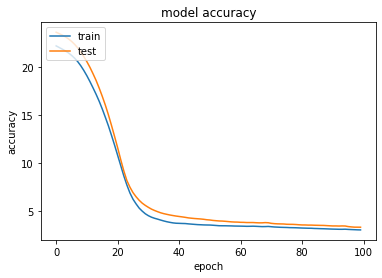

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### STEP5: EVALUATING

In [15]:
model.evaluate(X_test_scaled, y_test)

 32/102 [========>.....................] - ETA: 0s

[20.385016946231616, 3.466339260924096]

### STEP6: Prediction

In [16]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]

In [17]:
# we call the predict method
predictions = model.predict(to_predict)

In [18]:
# print the predictions
print(predictions)

[[13.428633]
 [40.264557]]


In [19]:
# print the real values
print(y_train[:2])

[15.2 42.3]


### STEP7: Saving model

In [ ]:
print("Saving model to disk \n")
mp = "D:\\1. Machine Learning\\Practical\\DL\\Krish\\Models\\iris_model.h5"
model.save(mp)